In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

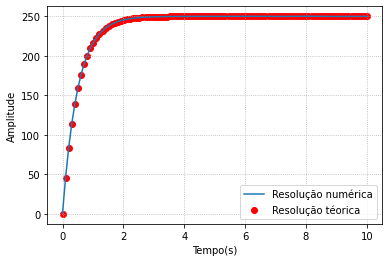

In [11]:
def modelo(t, args):
    A, K, tau = args
    return A*K*(1 - np.e**(-t/tau))

def EDO(t, S):
    omega = S
    K, A, tau = 50, 5, 0.5
    return [(K*A - omega)/tau]

inter = (0, 10)
t = np.linspace(inter[0], inter[1], 100)
S0 = np.array([1])
sol = solve_ivp(EDO, t_span=inter, y0=S0, t_eval=t)

fig, ax = plt.subplots()
ax.set(xlabel='Tempo(s)', ylabel='Amplitude')
ax.plot(sol.t, sol.y[0], label=r'Resolução numérica')
ax.scatter(sol.t, modelo(sol.t, (50,5,0.5)), c='r',label=r'Resolução téorica')

ax.legend()
ax.grid(ls='dotted')

plt.savefig('edo.pdf', bbox_inches='tight', dpi=600)

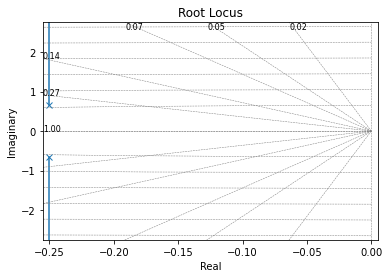

In [10]:
#%matplotlib
import control as ctl

G = ctl.tf([1.],[4,2,2])
fig, ax = plt.subplots()

ctl.rlocus(G)

plt.savefig('argon.pdf', bbox_inches='tight', dpi=600)